In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [33]:
df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
df.drop(columns=["CustomerID", "Gender"], inplace=True)

df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


{'whiskers': [<matplotlib.lines.Line2D at 0x1da54308a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1da54308f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da54308760>],
 'medians': [<matplotlib.lines.Line2D at 0x1da5430e4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da5430e760>],
 'means': []}

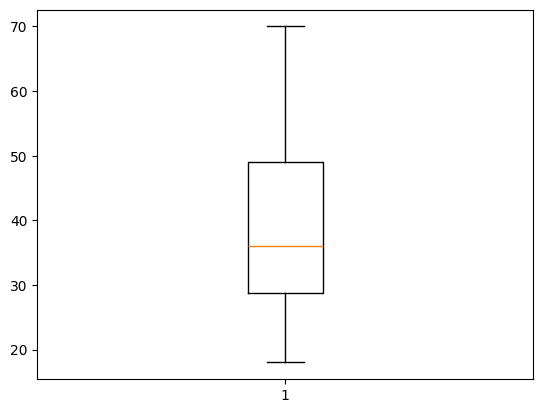

In [36]:
plt.figure()
plt.boxplot(df["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1da54352a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1da54352fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da543527f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1da5435e550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da542fe700>],
 'means': []}

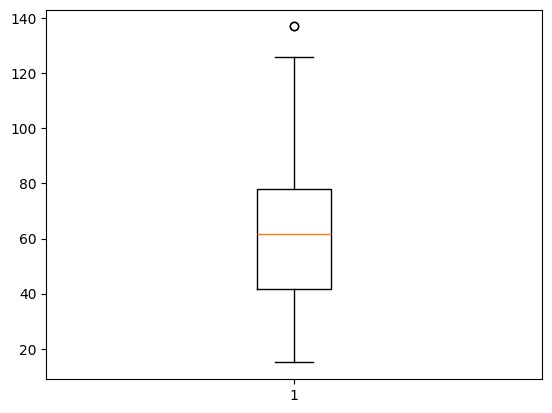

In [37]:
plt.boxplot(df["Annual Income (k$)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1da54386250>,
 'caps': [<matplotlib.lines.Line2D at 0x1da54386730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da544f8f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1da54386c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da54386f10>],
 'means': []}

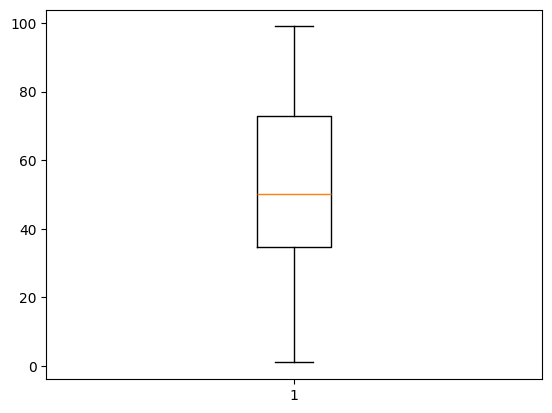

In [38]:
plt.boxplot(df["Spending Score (1-100)"])

In [39]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
df.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [41]:
df[df.duplicated()]

,Age,Annual Income (k$),Spending Score (1-100)


In [42]:
for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [47]:
class Kmeans():
    def __init__(self, n_clusters=2, max_iteration=100):
        self.n_clusters = n_clusters
        self.max_iteration = max_iteration
        self.centroid = None
        self.labels = None
        self.inertia = 0

    def fit(self, x):
        self.centroid = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.n_clusters, x.shape[1]))

        for iteration in range (self.max_iteration):
            self.labels = []
            distances_cluster = []
            for item in x:
                distance = np.sqrt(np.sum((item - self.centroid)**2, axis=1))
                distances_cluster.append(distance.min())
                cluster = np.argmin(x)
                self.labels.append(cluster)
            
            self.labels = np.array(self.labels)
            distances_cluster = np.array(distances_cluster)
            groups = []

            for i in range(self.n_clusters):
                groups.append(np.argwhere(self.labels == i))

            new_centroid = []
            sum_distances = []

            for i, indices in enumerate(groups):
                if len(indices) == 0:
                    new_centroid.append(self.centroid[i])
                else:
                    new_centroid.append(np.mean(x[indices], axis=0)[0])
                    sum_distances.append(np.sum(distances_cluster))

            self.inertia = np.mean(np.array(sum_distances)**2)

            print("centroid", self.centroid)
            print("new", new_centroid)
            if np.max(np.abs(self.centroid - np.array(new_centroid))) < 0.0001:
                break
            else:
                self.centroid = np.array(new_centroid)




            


In [48]:
wcss = []
for i in range(1, 11):
    kmean = Kmeans(n_clusters=i)
    kmean.fit(df.to_numpy())

    wcss.append(kmean.inertia)



c:\Users\Rizal\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Rizal\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


centroid [[0.99987128 0.95984447 0.51396187]]
new [array([0.99987128, 0.95984447, 0.51396187])]
centroid [[0.92345417 0.55278173 0.65006447]
 [0.16251441 0.37343141 0.32101901]]
new [array([0.92345417, 0.55278173, 0.65006447]), array([0.40096154, 0.37344262, 0.50204082])]
centroid [[0.92345417 0.55278173 0.65006447]
 [0.40096154 0.37344262 0.50204082]]
new [array([0.92345417, 0.55278173, 0.65006447]), array([0.40096154, 0.37344262, 0.50204082])]
centroid [[0.47392301 0.36678846 0.92219881]
 [0.92119926 0.4864559  0.81966512]
 [0.21458658 0.96514089 0.15008879]]
new [array([0.47392301, 0.36678846, 0.92219881]), array([0.40096154, 0.37344262, 0.50204082]), array([0.21458658, 0.96514089, 0.15008879])]
centroid [[0.47392301 0.36678846 0.92219881]
 [0.40096154 0.37344262 0.50204082]
 [0.21458658 0.96514089 0.15008879]]
new [array([0.47392301, 0.36678846, 0.92219881]), array([0.40096154, 0.37344262, 0.50204082]), array([0.21458658, 0.96514089, 0.15008879])]
centroid [[0.52536612 0.89458574 0

Text(0, 0.5, 'wcsss')

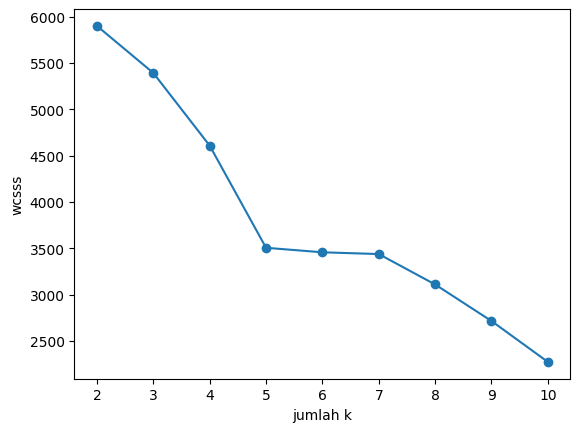

In [49]:
plt.plot(np.arange(1, 11), wcss, marker='o')
plt.xlabel("jumlah k")
plt.ylabel("wcsss")